In [ ]:
#necessary modules
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel,preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys,os

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/Emotion detection.zip'

Streaming output truncated to the last 5000 lines.

 extracting: Emotion detection/train/sad/im370.png  

 extracting: Emotion detection/train/sad/im3700.png  

 extracting: Emotion detection/train/sad/im3701.png  

 extracting: Emotion detection/train/sad/im3702.png  

 extracting: Emotion detection/train/sad/im3703.png  

 extracting: Emotion detection/train/sad/im3704.png  

 extracting: Emotion detection/train/sad/im3705.png  

 extracting: Emotion detection/train/sad/im3706.png  

 extracting: Emotion detection/train/sad/im3707.png  

 extracting: Emotion detection/train/sad/im3708.png  

 extracting: Emotion detection/train/sad/im3709.png  

 extracting: Emotion detection/train/sad/im371.png  

 extracting: Emotion detection/train/sad/im3710.png  

 extracting: Emotion detection/train/sad/im3711.png  

 extracting: Emotion detection/train/sad/im3712.png  

 extracting: Emotion detection/train/sad/im3713.png  

 extracting: Emotion detection/train/sad/im3714.png  

 extracting: Em

In [ ]:
#training and testing file path for both debris and rebar is defined
train_path='/content/Emotion detection/train'
valid_path='/content/Emotion detection/test'


In [ ]:
#target image size (in 2D)
IMAGE_SIZE=[48,48]

In [ ]:
#TRAIN,TEST,VLIDATION image files
train_files=glob(train_path+'/*/*.png')
valid_image_files=glob(valid_path+'/*/*.png')

In [ ]:
#no of training images
len(train_files)

28709

In [ ]:
#no of folders=no of classses here debris ehich is folder[0] is markes as 0 and rebars are marked as 1
folders=glob(train_path+'/*')
folders

['/content/Emotion detection/train/happy',
 '/content/Emotion detection/train/neutral',
 '/content/Emotion detection/train/sad',
 '/content/Emotion detection/train/fearful',
 '/content/Emotion detection/train/angry',
 '/content/Emotion detection/train/surprised',
 '/content/Emotion detection/train/disgusted']

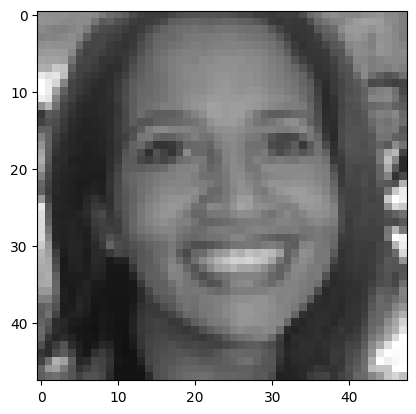

In [ ]:
#sanity checking
plt.imshow(image.load_img(np.random.choice(train_files)))
plt.show()

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout,GlobalMaxPooling2D,MaxPooling2D,BatchNormalization
K=len(folders)
i=Input(shape=(48,48,3))
x=Conv2D(32,(3,3),activation='relu',padding='same')(i)
x=BatchNormalization()(x)
x=Conv2D(32,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
#x=MaxPooling2D((2,2))(x) #decrease test accuracy
x=GlobalMaxPooling2D()(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(units=512,activation='relu')(x)
x=Dense(units=K,activation='softmax')(x)

model=Model(i,x)

In [ ]:
model.summary()

Model: "model_1"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         

                                                                 

 conv2d_6 (Conv2D)           (None, 48, 48, 32)        896       

                                                                 

 batch_normalization_6 (Batc  (None, 48, 48, 32)       128       

 hNormalization)                                                 

                                                                 

 conv2d_7 (Conv2D)           (None, 48, 48, 32)        9248      

                                                                 

 batch_normalization_7 (Batc  (None, 48, 48, 32)       128       

 hNormalization)                                                 

                                                                 

 max_pooling2d_2 (MaxPooling  (None, 24, 24

In [ ]:
#data augmentation
gen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
#for test images
gen_test=ImageDataGenerator(
    rescale=1./255
)

In [ ]:
batch_size=128
#implimentation of augmentation
train_generator=gen.flow_from_directory(
    train_path,
    shuffle=True,
    target_size=(48,48),
    batch_size=batch_size
)
valid_generator=gen_test.flow_from_directory(
    valid_path,
    shuffle=True,
    target_size=(48,48),
    batch_size=batch_size
)

Found 28709 images belonging to 7 classes.

Found 7178 images belonging to 7 classes.


In [ ]:
a=next(valid_generator)
a[0].shape

(128, 48, 48, 3)

In [ ]:
#compiling model, categorical crossentropy is used as input labels are one-hot encoded
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

from logging import StringTemplateStyle
r=model.fit(train_generator,validation_data=valid_generator,
                      epochs=25,steps_per_epoch=int(np.ceil(len(train_files)/batch_size)),
                      validation_steps=int(np.ceil(len(valid_image_files)/batch_size))) 

Epoch 1/25

225/225 [==============================] - 58s 190ms/step - loss: 1.8895 - accuracy: 0.2286 - val_loss: 1.8708 - val_accuracy: 0.1811

Epoch 2/25

225/225 [==============================] - 41s 183ms/step - loss: 1.6974 - accuracy: 0.3143 - val_loss: 1.6260 - val_accuracy: 0.3853

Epoch 3/25

225/225 [==============================] - 41s 184ms/step - loss: 1.5014 - accuracy: 0.4122 - val_loss: 1.3940 - val_accuracy: 0.4702

Epoch 4/25

225/225 [==============================] - 42s 185ms/step - loss: 1.3789 - accuracy: 0.4669 - val_loss: 1.4207 - val_accuracy: 0.4519

Epoch 5/25

225/225 [==============================] - 42s 185ms/step - loss: 1.2943 - accuracy: 0.5049 - val_loss: 1.3367 - val_accuracy: 0.4863

Epoch 6/25

225/225 [==============================] - 42s 185ms/step - loss: 1.2361 - accuracy: 0.5289 - val_loss: 1.2758 - val_accuracy: 0.5117

Epoch 7/25

225/225 [==============================] - 42s 185ms/step - loss: 1.1982 - accuracy: 0.5410 - val_loss: 1.

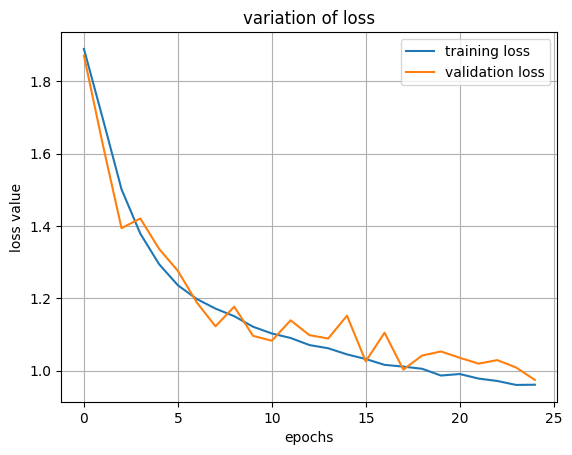

In [ ]:
plt.plot(r.history['loss'],label='training loss')
plt.plot(r.history['val_loss'],label='validation loss');
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss value")
plt.title('variation of loss')
plt.legend();

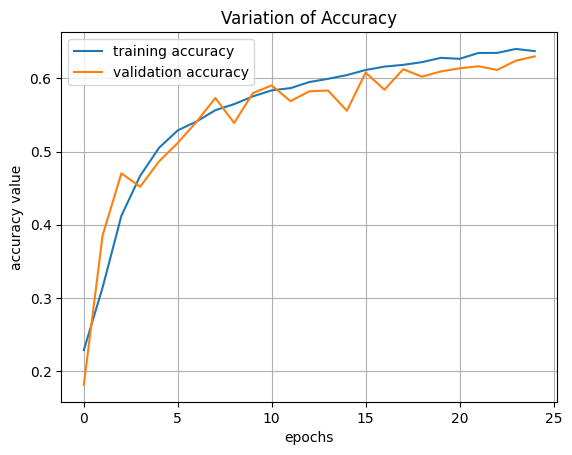

In [ ]:
plt.plot(r.history['accuracy'],label='training accuracy')
plt.plot(r.history['val_accuracy'],label='validation accuracy')
plt.grid()
plt.xlabel("epochs")
plt.ylabel("accuracy value")
plt.title('Variation of Accuracy')
plt.legend();

In [ ]:
#prediction on validation set (argmax is taken as softmax will give prob of two classes and we are taking max out of them)
y_predicted=model.predict(valid_generator).argmax(axis=1)

57/57 [==============================] - 3s 51ms/step


In [ ]:
#validation accuracy and loss
score=model.evaluate(valid_generator)
print(score)

57/57 [==============================] - 3s 46ms/step - loss: 0.9743 - accuracy: 0.6300

[0.974267303943634, 0.6299805045127869]


In [ ]:
#comparison by taking one instance of data augmentation
a=next(valid_generator)
y_predicted=model.predict(a[0]).argmax(axis=1)
y_original=a[1].argmax(axis=1)

4/4 [==============================] - 0s 4ms/step


In [ ]:
#checking sanity
print(y_original)
print(y_predicted)

[5 6 0 6 5 5 5 5 5 5 6 3 4 4 6 4 3 3 3 4 0 3 0 5 3 3 4 2 6 0 5 0 5 3 5 0 4

 4 3 6 2 3 5 6 3 6 3 3 0 6 4 4 4 3 3 6 4 1 2 2 0 4 6 2 6 2 5 2 5 0 3 3 5 2

 3 3 4 3 3 5 3 2 4 3 5 0 6 4 0 5 6 2 3 0 4 6 6 3 5 2 6 3 3 3 6 3 3 6 3 3 3

 3 2 4 5 3 4 3 0 6 3 3 1 3 6 1 2 3]

[0 6 0 6 5 0 5 5 5 0 6 3 4 2 6 4 3 3 3 4 0 3 0 5 3 3 0 2 6 0 2 4 5 3 3 0 4

 0 3 6 6 3 2 6 3 6 3 3 0 6 4 4 4 3 3 6 4 1 6 5 6 4 6 4 6 2 0 5 4 1 3 3 4 0

 3 3 5 3 3 4 3 4 0 3 4 0 6 4 0 4 0 6 3 0 4 2 6 3 5 2 6 3 3 4 2 3 3 6 3 3 3

 3 2 4 5 3 5 3 0 6 3 3 0 3 6 1 2 3]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_original,y_predicted))

              precision    recall  f1-score   support



           0       0.50      0.77      0.61        13

           1       0.67      0.67      0.67         3

           2       0.50      0.38      0.43        13

           3       0.97      0.97      0.97        40

           4       0.57      0.67      0.62        18

           5       0.67      0.40      0.50        20

           6       0.82      0.86      0.84        21



    accuracy                           0.73       128

   macro avg       0.67      0.67      0.66       128

weighted avg       0.74      0.73      0.73       128




In [ ]:
#dataframe for comparison
df_out=pd.DataFrame(zip(y_original,y_predicted),columns=['original','predicted'])

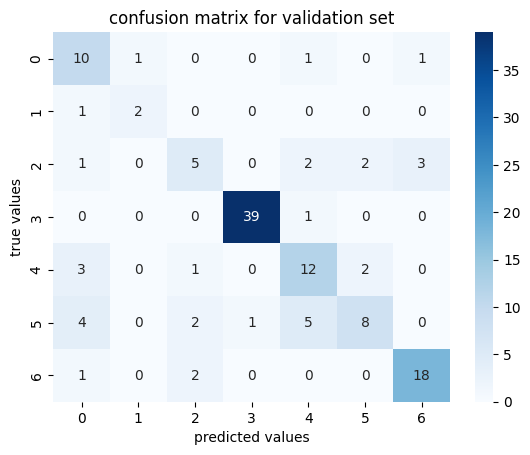

In [ ]:
#visualisation using confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(df_out['original'],df_out['predicted'])
import seaborn as sns
sns.heatmap(conf_mat,annot=True,fmt='.0f',cmap='Blues');
plt.xlabel("predicted values")
plt.ylabel("true values")
plt.title("confusion matrix for validation set");

In [ ]:
#labeling
my_dict={0:'angry',
         1:'disgusted',
         2:'fearful',
         3:'happy',
         4:'neutral',
         5:'sad',
         6:'surprised'}

In [ ]:
from tensorflow.keras.models import save_model
new_model=save_model(model,'/content/drive/MyDrive/Colab Notebooks/emotion_detection.h5')

 predicted level=angry	original level=sad


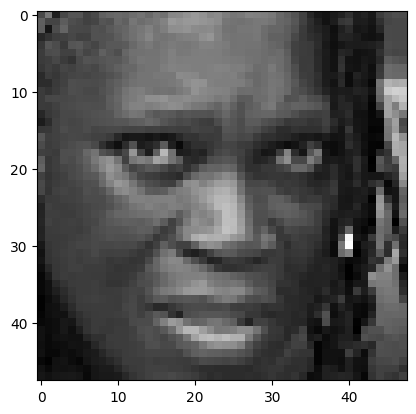

 predicted level=angry	original level=sad


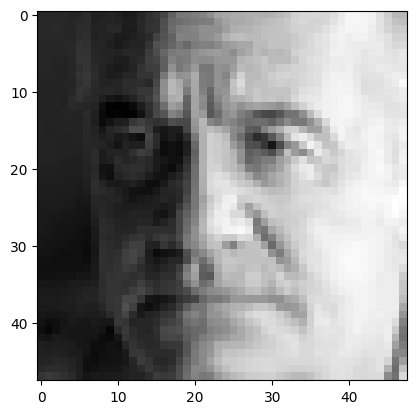

 predicted level=angry	original level=sad


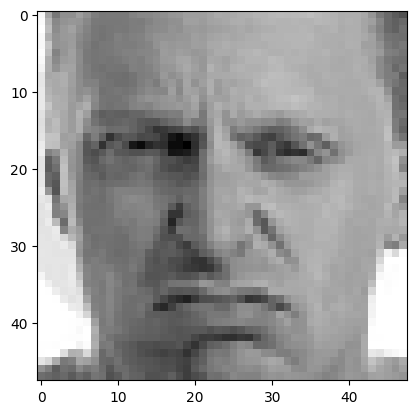

 predicted level=fearful	original level=neutral


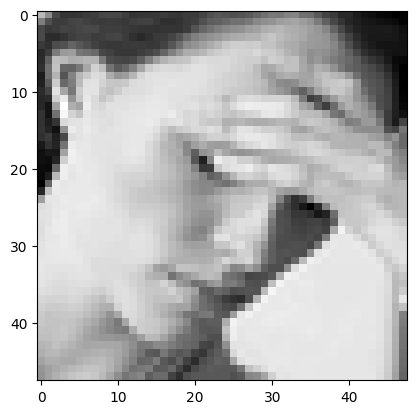

 predicted level=angry	original level=neutral


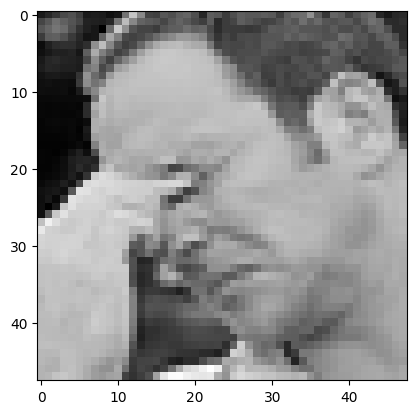

 predicted level=fearful	original level=sad


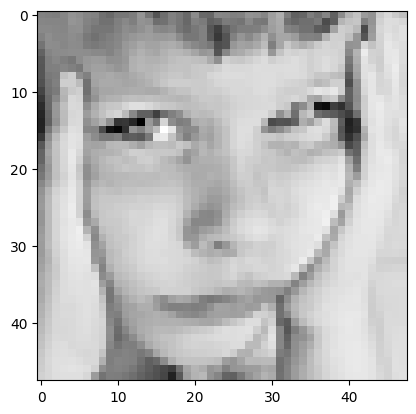

 predicted level=neutral	original level=angry


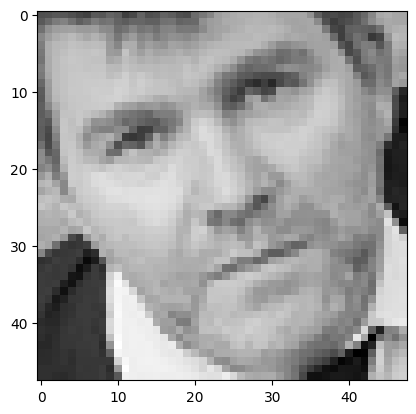

 predicted level=happy	original level=sad


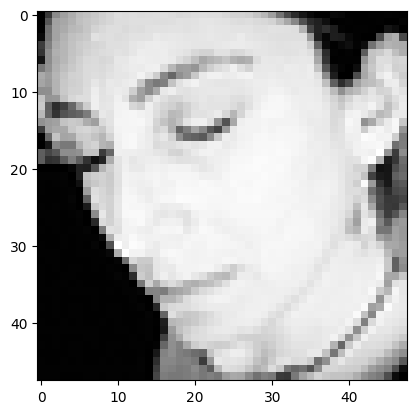

 predicted level=angry	original level=neutral


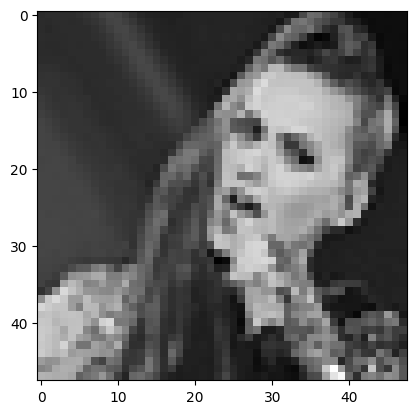

 predicted level=surprised	original level=fearful


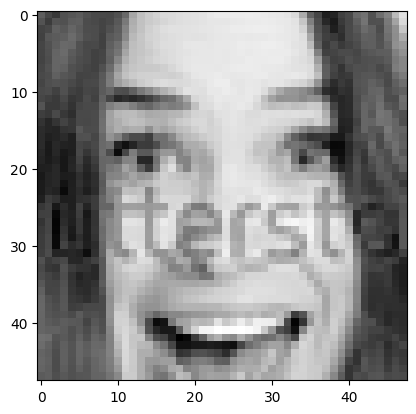

In [ ]:
#missclassified image
import tensorflow as tf
plt.gray()
misclassified_index=np.where(df_out['original']!=df_out['predicted'])[0]
for i in misclassified_index[:10]:
  print(f'\033[91m predicted level={my_dict[y_predicted[i]]}\toriginal level={my_dict[y_original[i]]}')
  plt.imshow(tf.image.rgb_to_grayscale(a[0][i]))
  plt.show();

In [ ]:
from tensorflow.keras.models import load_model
new_model=load_model('/content/drive/MyDrive/Colab Notebooks/emotion_detection.h5')

In [ ]:
b=next(valid_generator)
y_predicted=new_model.predict(b[0]).argmax(axis=1)
y_original=a[1].argmax(axis=1)

4/4 [==============================] - 0s 4ms/step


In [ ]:
#checking sanity
print(y_original)
print(y_predicted)

[6 5 5 0 5 6 1 0 6 2 3 4 3 3 5 4 0 0 6 4 0 5 5 0 2 4 5 3 2 2 4 3 4 3 3 3 5

 6 4 3 6 4 3 5 4 4 5 3 5 2 0 0 4 3 3 4 5 5 5 2 4 2 2 3 3 5 0 4 0 3 3 3 2 6

 5 3 6 3 2 3 3 4 6 4 5 5 6 0 5 6 0 2 3 6 4 0 6 3 2 0 4 2 2 6 3 5 0 6 2 4 3

 0 4 0 4 0 3 2 5 0 2 6 1 2 6 3 4 6]

[4 4 0 4 3 6 6 4 5 5 4 3 3 6 2 5 4 6 0 4 3 3 6 2 5 3 5 2 0 0 3 3 6 6 4 3 0

 2 4 6 3 5 0 5 6 5 4 6 6 5 0 4 0 5 3 5 2 0 4 5 5 5 2 0 1 4 6 3 3 2 4 0 4 6

 4 3 4 6 5 3 6 5 6 5 5 5 3 6 4 4 0 3 6 3 4 0 4 0 0 4 4 3 2 3 0 4 5 5 3 3 0

 5 4 6 5 4 2 0 0 0 2 4 0 4 3 4 3 6]


In [ ]:
model.ac